# Fitting a GEV Distribution to Annual Maxima Data

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import sys
import pandas as pd
import numpy as np
from scipy.stats import genextreme

# parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# sys.path.insert(0, parent_dir)

from gev_estimator import extreme_value_mcmc

In [13]:
# Load in the example data
cs_annual_max_df = pd.read_parquet("../data/CS_annual_max.parquet")
cs_annual_max_df.head()

,gcm,neighbourhood,variable,scenario,ensemble,lat,lon,2015,2016,2017,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,ACCESS-CM2,CS,rsds,ssp126,r1i1p1f1,51.875,-6.5625,350.21588,369.73880,361.13287,...,352.75232,360.37006,352.76420,355.38590,355.35990,357.76532,360.08430,359.33557,357.07250,366.14822
1,ACCESS-CM2,CS,rsds,ssp126,r4i1p1f1,51.875,-6.5625,352.66150,356.50340,355.95316,...,354.16570,363.69833,361.34702,352.68726,359.23438,355.07068,358.53506,359.10065,359.34980,364.62330
2,ACCESS-CM2,CS,rsds,ssp126,r5i1p1f1,51.875,-6.5625,355.41238,350.02533,356.37857,...,362.30817,357.79428,356.68463,357.82047,370.37918,367.69500,360.70984,356.64984,352.45642,358.56763
3,ACCESS-CM2,CS,rsds,ssp245,r1i1p1f1,51.875,-6.5625,360.21870,353.25342,358.31360,...,360.62480,356.37128,352.41144,363.71976,350.68814,353.19595,361.60370,362.48660,351.86832,356.12110
4,ACCESS-CM2,CS,rsds,ssp245,r4i1p1f1,51.875,-6.5625,361.20786,350.06244,359.93365,...,349.73215,356.29990,358.54752,355.17480,354.36240,354.56915,361.51187,358.11356,347.74330,355.41785


In [14]:
data = cs_annual_max_df[(cs_annual_max_df['gcm'] == 'ACCESS-CM2') & (cs_annual_max_df['variable'] == 'tas') & (cs_annual_max_df['scenario'] == 'ssp585') & (cs_annual_max_df['ensemble'] == 'r1i1p1f1')].iloc[:, 7:]
data = data.values.ravel()

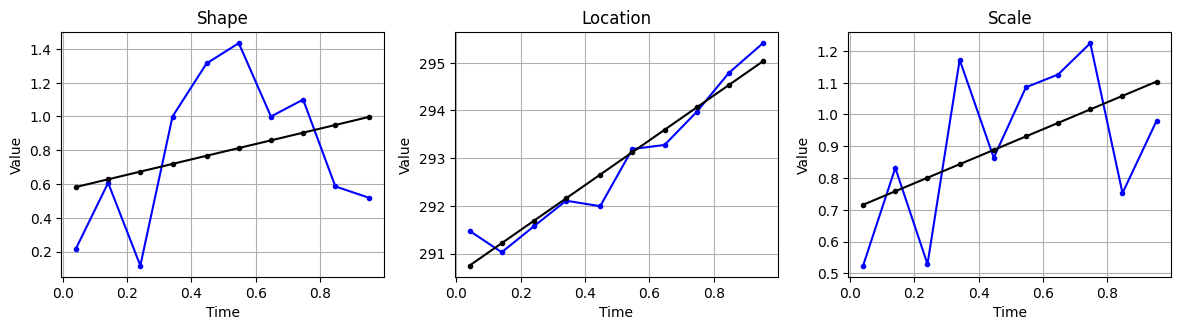

Initial parameters result in an invalid negative log likelihood: nan
Try Stationary Solution: [292.2783732999617, 0, 1.3941075573558934, 0, 0.10566439843322208, 0]
Valid Stationary Solution Found


C:\Users\Callum.Leach\OneDrive - Shell\Documents\Philip Project\src\gev_estimator.py:325: RuntimeWarning:

invalid value encountered in scalar add



In [15]:
gev_estimator = extreme_value_mcmc(data, non_stationary=True)

In [16]:
n_samples = 10000
n2plt = 5000
burn_in = 1000
thinning = 1
beta = 0.05

samples, total_accepted, rejected, ar, parameter_medians = gev_estimator.run(n_samples, n2plt, burn_in, thinning, beta)

C:\Users\Callum.Leach\OneDrive - Shell\Documents\Philip Project\src\gev_estimator.py:96: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\Callum.Leach\OneDrive - Shell\Documents\Philip Project\src\gev_estimator.py:167: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\Callum.Leach\OneDrive - Shell\Documents\Philip Project\src\gev_estimator.py:178: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longe

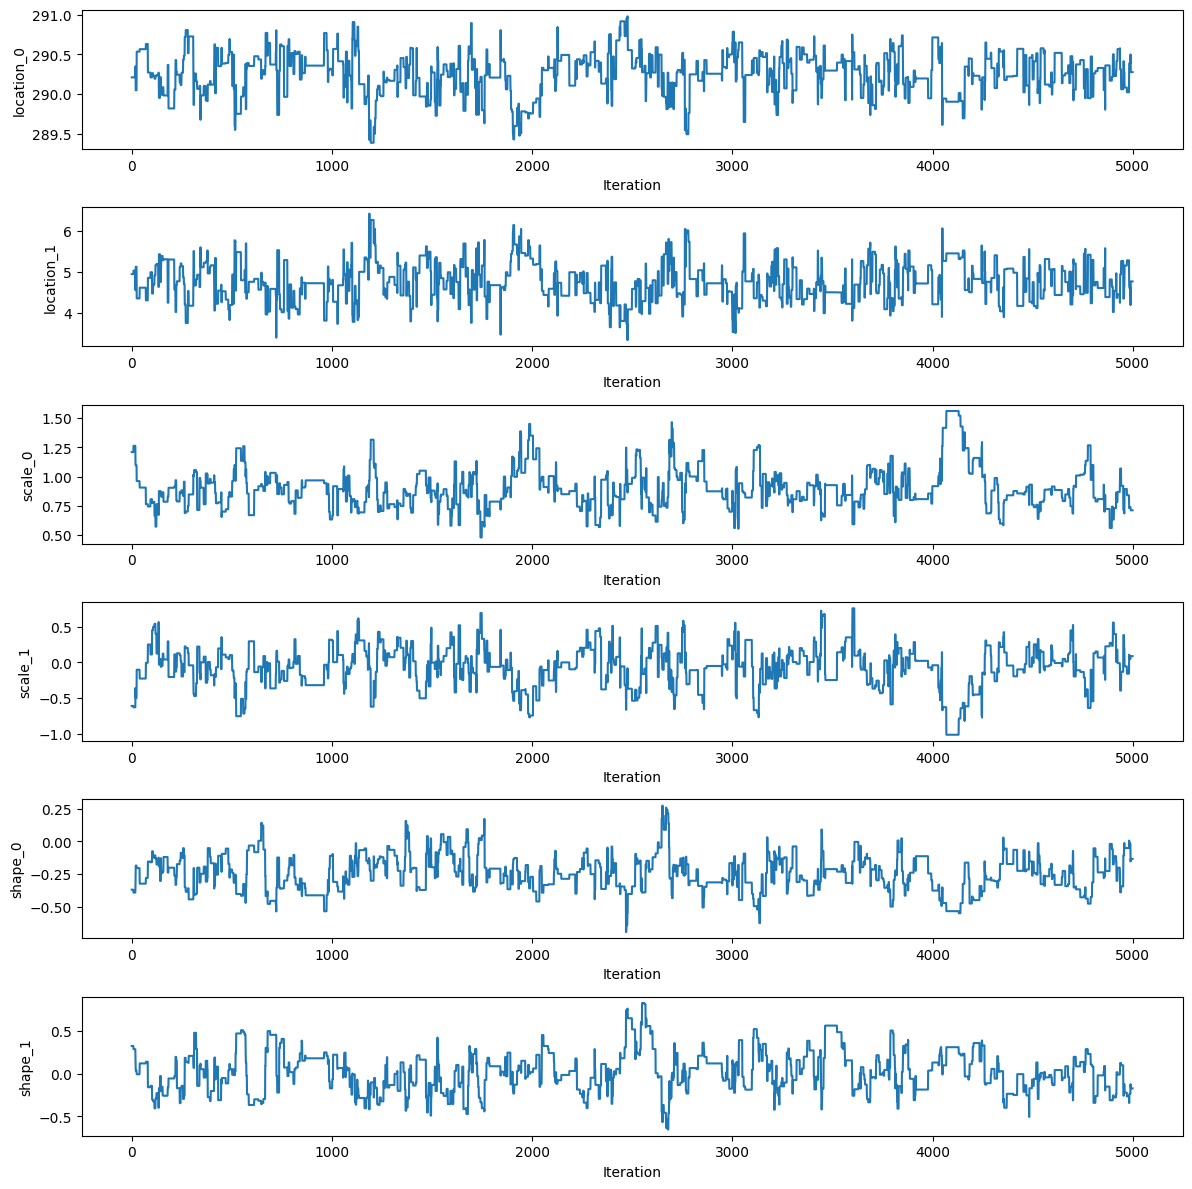

In [17]:
gev_estimator.plot_trace_plots(samples)

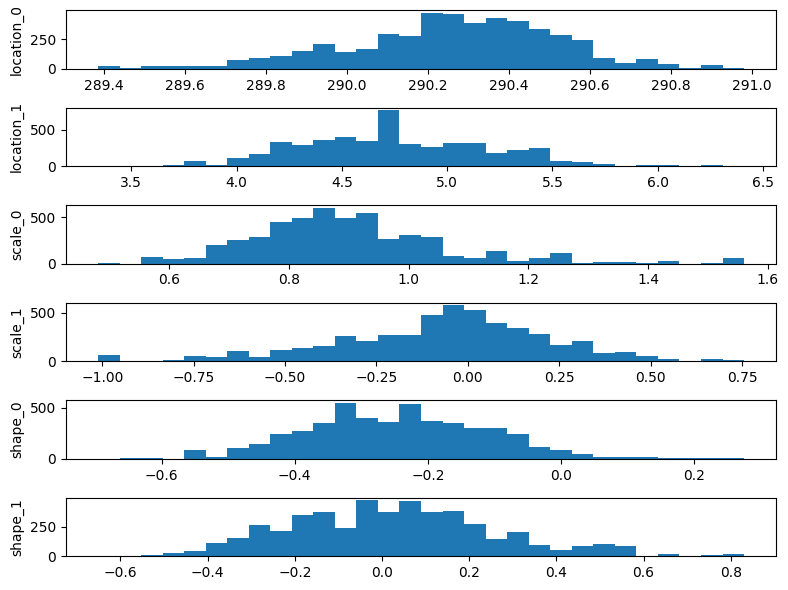

In [18]:
gev_estimator.plot_parameter_distributions(samples)

In [19]:
gev_estimator.plot_acceptance_rate(ar)

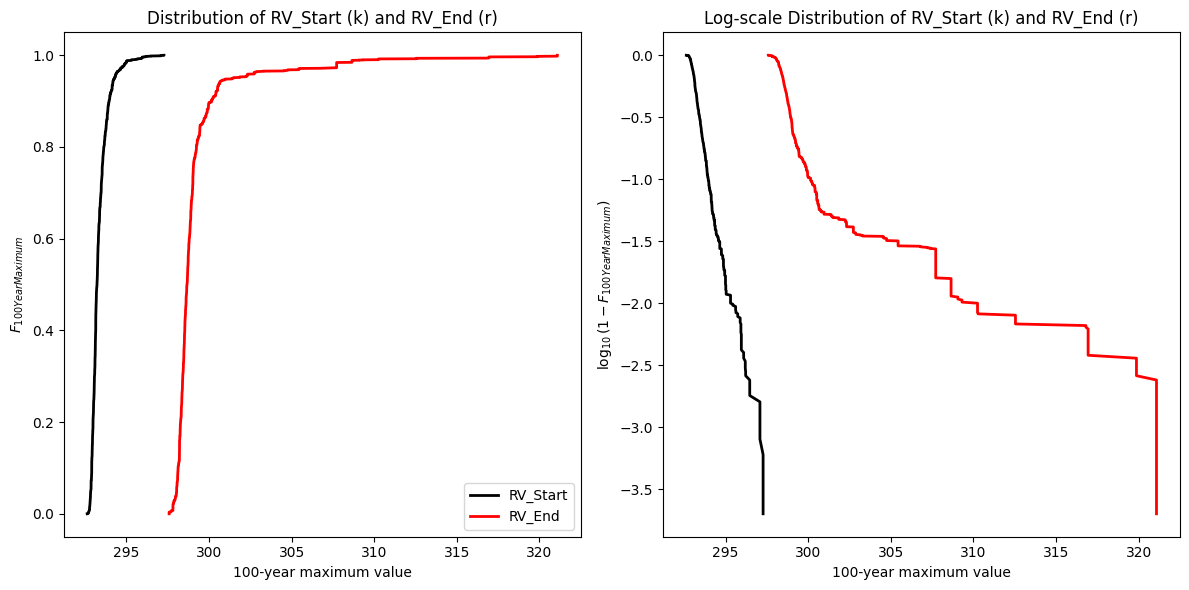

Prb(RVEnd > RVStart) = 1.00 SIGNIFICANT


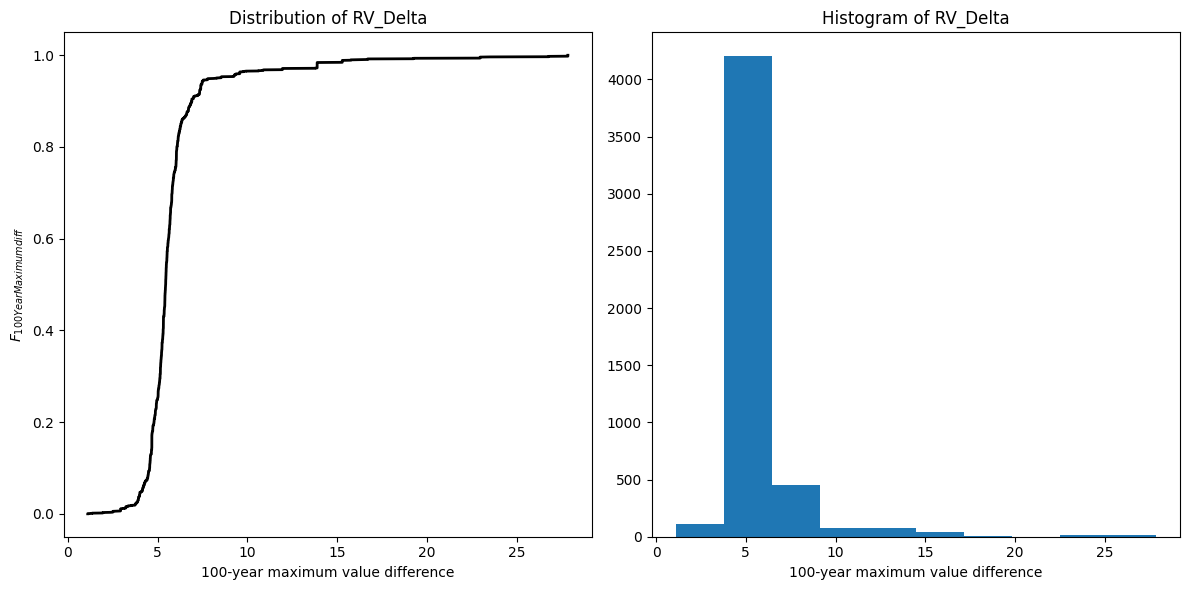

In [20]:
return_values = gev_estimator.plot_return_values(samples)